## Interest Points and Matching

We will go through the steps of matching interest / key points from one image to another (left to right). We use OpenCV for this task, an open source image processing library. We also use matplotlib to display the images within this notebook. First we load the images and convert them to grayscale images. The we extract the keypoint locations and the SIFT descriptor for every location. In the final step we match the features according by the Euclidean distance (L2 norm) of their descriptors.

### Imports

In [2]:
import cv2
from matplotlib import pyplot as plt

print('OpenCV version: {}'.format(cv2.__version__))

OpenCV version: 3.3.1


### Load images

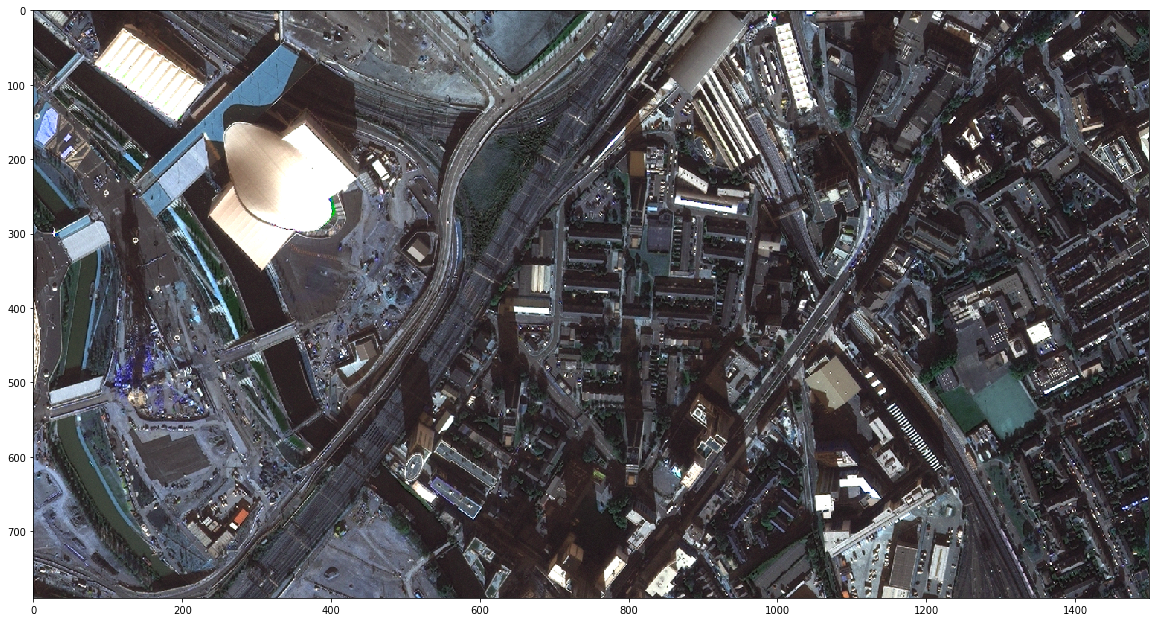

Left image size: (790, 1500, 3)
Right image size: (791, 1500, 3)


In [6]:
left = cv2.imread(r'Picture2.png')
right = cv2.imread(r'Picture3.png')
plt.figure(figsize = (20,20))
plt.imshow(left)
plt.show()

print('Left image size: {}'.format(left.shape))
print('Right image size: {}'.format(right.shape))

# convert to greyscale
left_g = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
right_g = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)

In [9]:
left_g

array([[126, 139, 147, ...,  36,  42,  50],
       [123, 123, 143, ...,  40,  43,  37],
       [197, 108, 113, ...,  40,  43,  43],
       ...,
       [ 63,  61,  57, ...,  39,  49,  51],
       [ 71,  70,  72, ...,  40,  39,  54],
       [ 78,  80,  83, ...,  41,  27,  49]], dtype=uint8)

### Extract key-points and descriptors using SIFT (Scale-Invariant Feature Transform)

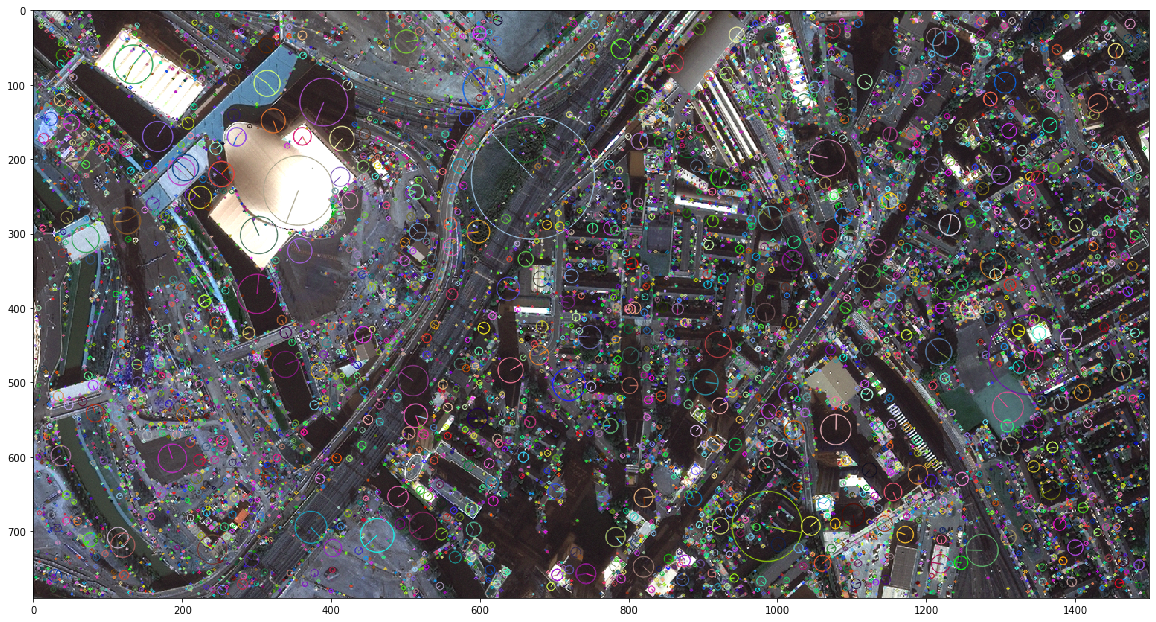

no. of SIFT keypoints left: 12634, right:14798


In [15]:
sift = cv2.xfeatures2d.SIFT_create()

# keypoints, descriptors = cv.Feature2D.detectAndCompute(image, mask[, descriptors[, useProvidedKeypoints]])
left_p, left_d = sift.detectAndCompute(left_g, None)
right_p, right_d = sift.detectAndCompute(right_g, None)

result = cv2.drawKeypoints(left, left_p, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (20,20))
plt.imshow(result)
plt.show()

print('no. of SIFT keypoints left: {}, right:{}'.format(len(left_p), len(right_p)))

In [17]:
left_d

array([[ 28.,  64.,  71., ...,  17.,  12.,   2.],
       [ 12.,   7.,   2., ...,   0.,   0.,   0.],
       [ 19.,  70., 117., ...,   1.,   0.,   0.],
       ...,
       [  0.,  10.,  40., ...,   4.,   0.,   0.],
       [ 19.,  11.,  12., ...,   0.,   0.,   0.],
       [ 18.,  11.,   1., ...,   1.,   0.,   0.]], dtype=float32)

### Alternative: Extract key-points and descriptors using ORB (Oriented FAST and Rotated BRIEF)

In [12]:
# ORB is limited to 500 feature points by default (can be changed)
orb = cv2.ORB_create(nfeatures=500)
left_p, left_d = orb.detectAndCompute(left_g, None)
right_p, right_d = orb.detectAndCompute(right_g, None)

print('no. of keypoints left: {}, right:{}'.format(len(left_p), len(right_p)))

# remember we need to use a differnt distance norm for matching later as ORB is a binary desriptor
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # so called brute force (BF) matcher


no. of keypoints left: 500, right:500


### Match descriptors

In [16]:
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # so called brute force (BF) matcher
matches = matcher.match(left_d, right_d)

print('no. of matches: {}'.format(len(matches)))

# Sort the matches by Euclidean distance
matches = sorted(matches, key=lambda x:x.distance)

no. of matches: 8121


In [19]:
matches

[<DMatch 000001F1C08DE330>,
 <DMatch 000001F1C08E6C10>,
 <DMatch 000001F1C08DD6B0>,
 <DMatch 000001F1C08DD470>,
 <DMatch 000001F1C0BE0A90>,
 <DMatch 000001F1C08DE8D0>,
 <DMatch 000001F1C0BE08B0>,
 <DMatch 000001F1C0BE8D70>,
 <DMatch 000001F1C08DF1F0>,
 <DMatch 000001F1C0BE7B10>,
 <DMatch 000001F1C0BE0A70>,
 <DMatch 000001F1C0897EF0>,
 <DMatch 000001F1C08FC630>,
 <DMatch 000001F1C0BF8590>,
 <DMatch 000001F1C08DF350>,
 <DMatch 000001F1C0BE0BD0>,
 <DMatch 000001F1C08E4310>,
 <DMatch 000001F1C08E0E90>,
 <DMatch 000001F1C0BE0E30>,
 <DMatch 000001F1C08E2CF0>,
 <DMatch 000001F1C0BE0E10>,
 <DMatch 000001F1C08ED050>,
 <DMatch 000001F1C08E6690>,
 <DMatch 000001F1C08F57F0>,
 <DMatch 000001F1C0BE8770>,
 <DMatch 000001F1C08E80B0>,
 <DMatch 000001F1C08E7330>,
 <DMatch 000001F1C08DE890>,
 <DMatch 000001F1C08E2B50>,
 <DMatch 000001F1C08E6F50>,
 <DMatch 000001F1C08F9E70>,
 <DMatch 000001F1C08E9530>,
 <DMatch 000001F1C0BE1530>,
 <DMatch 000001F1C0BEB290>,
 <DMatch 000001F1C0BE5390>,
 <DMatch 000001F1C0B

### Show matches
 Show the matches (only the first n=50) by drawing a line from keypoints in the left image to matched keypoints in teh right image 

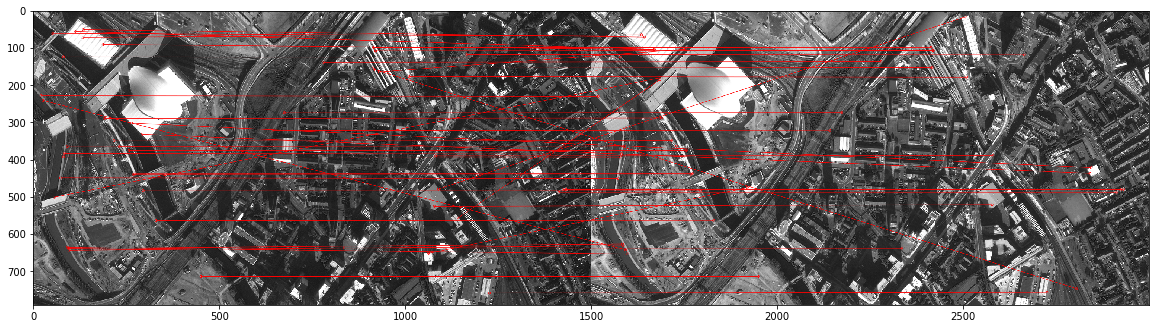

In [27]:
n=50
result = cv2.drawMatches(left_g, left_p, right_g, right_p, matches[:n], 
                         None, (256, 0, 0), flags=2)
plt.figure(figsize = (20,20))
plt.imshow(result)
plt.show()

no. of matches: 7694


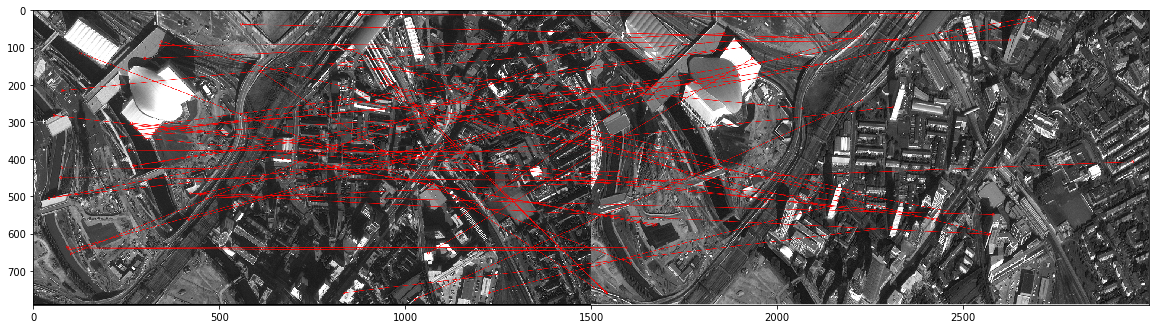

In [30]:
four = cv2.imread(r'Picture4.png')

# convert to greyscale
four_g = cv2.cvtColor(four, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()

# keypoints, descriptors = cv.Feature2D.detectAndCompute(image, mask[, descriptors[, useProvidedKeypoints]])
left_p, left_d = sift.detectAndCompute(left_g, None)
four_p, four_d = sift.detectAndCompute(four_g, None)

matcher1 = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # so called brute force (BF) matcher
matches1 = matcher.match(left_d, four_d)

print('no. of matches: {}'.format(len(matches1)))

# Sort the matches by Euclidean distance
matches1 = sorted(matches1, key=lambda x:x.distance)

n=50
result = cv2.drawMatches(left_g, left_p, four_g, four_p, matches1[:n], 
                         None, (256, 0, 0), flags=2)
plt.figure(figsize = (20,20))
plt.imshow(result)
plt.show()

no. of matches: 7899


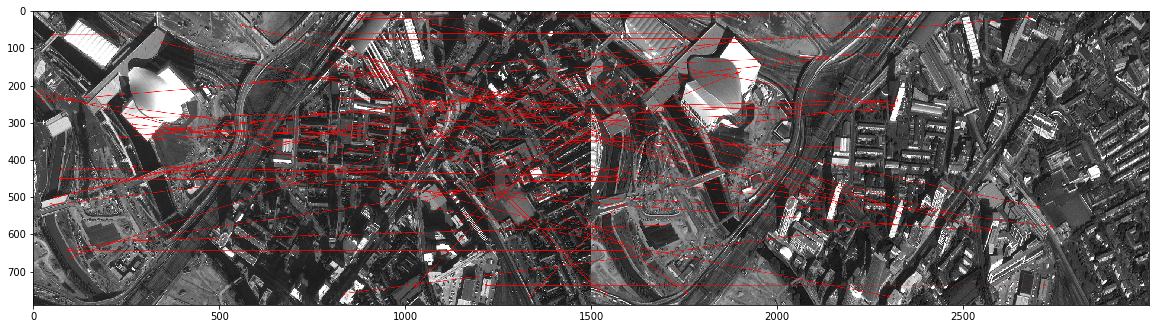

In [32]:
five = cv2.imread(r'Picture5.png')

# convert to greyscale
five_g = cv2.cvtColor(five, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()

# keypoints, descriptors = cv.Feature2D.detectAndCompute(image, mask[, descriptors[, useProvidedKeypoints]])
left_p, left_d = sift.detectAndCompute(left_g, None)
five_p, five_d = sift.detectAndCompute(five_g, None)

matcher2 = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # so called brute force (BF) matcher
matches2 = matcher.match(left_d, five_d)

print('no. of matches: {}'.format(len(matches2)))

# Sort the matches by Euclidean distance
matches2 = sorted(matches2, key=lambda x:x.distance)

n=50
result = cv2.drawMatches(left_g, left_p, five_g, five_p, matches2[:n], 
                         None, (256, 0, 0), flags=2)
plt.figure(figsize = (20,20))
plt.imshow(result)
plt.show()

### Tasks
* How can you quickly judge if the matches are correct or not?
* Start from Picture 2 and successively match to 3 and 4. Do you see a change in the quality of the matches?
* The matching does not use the ratio criterion suggested by Lowe. Can you implement it?


In [ ]:
# 1. Sorted by distance, choose the first 50 matches
# 2. 
